# Predict Bike Sharing Demand with AutoGluon Template

## Project: Predict Bike Sharing Demand with AutoGluon
This notebook is a template with each step that you need to complete for the project.

Please fill in your code where there are explicit `?` markers in the notebook. You are welcome to add more cells and code as you see fit.

Once you have completed all the code implementations, please export your notebook as a HTML file so the reviews can view your code. Make sure you have all outputs correctly outputted.

`File-> Export Notebook As... -> Export Notebook as HTML`

There is a writeup to complete as well after all code implememtation is done. Please answer all questions and attach the necessary tables and charts. You can complete the writeup in either markdown or PDF.

Completing the code template and writeup template will cover all of the rubric points for this project.

The rubric contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this notebook and also discuss the results in the writeup file.

## Step 1: Create an account with Kaggle

### Create Kaggle Account and download API key
Below is example of steps to get the API username and key. Each student will have their own username and key.

1. Open account settings.
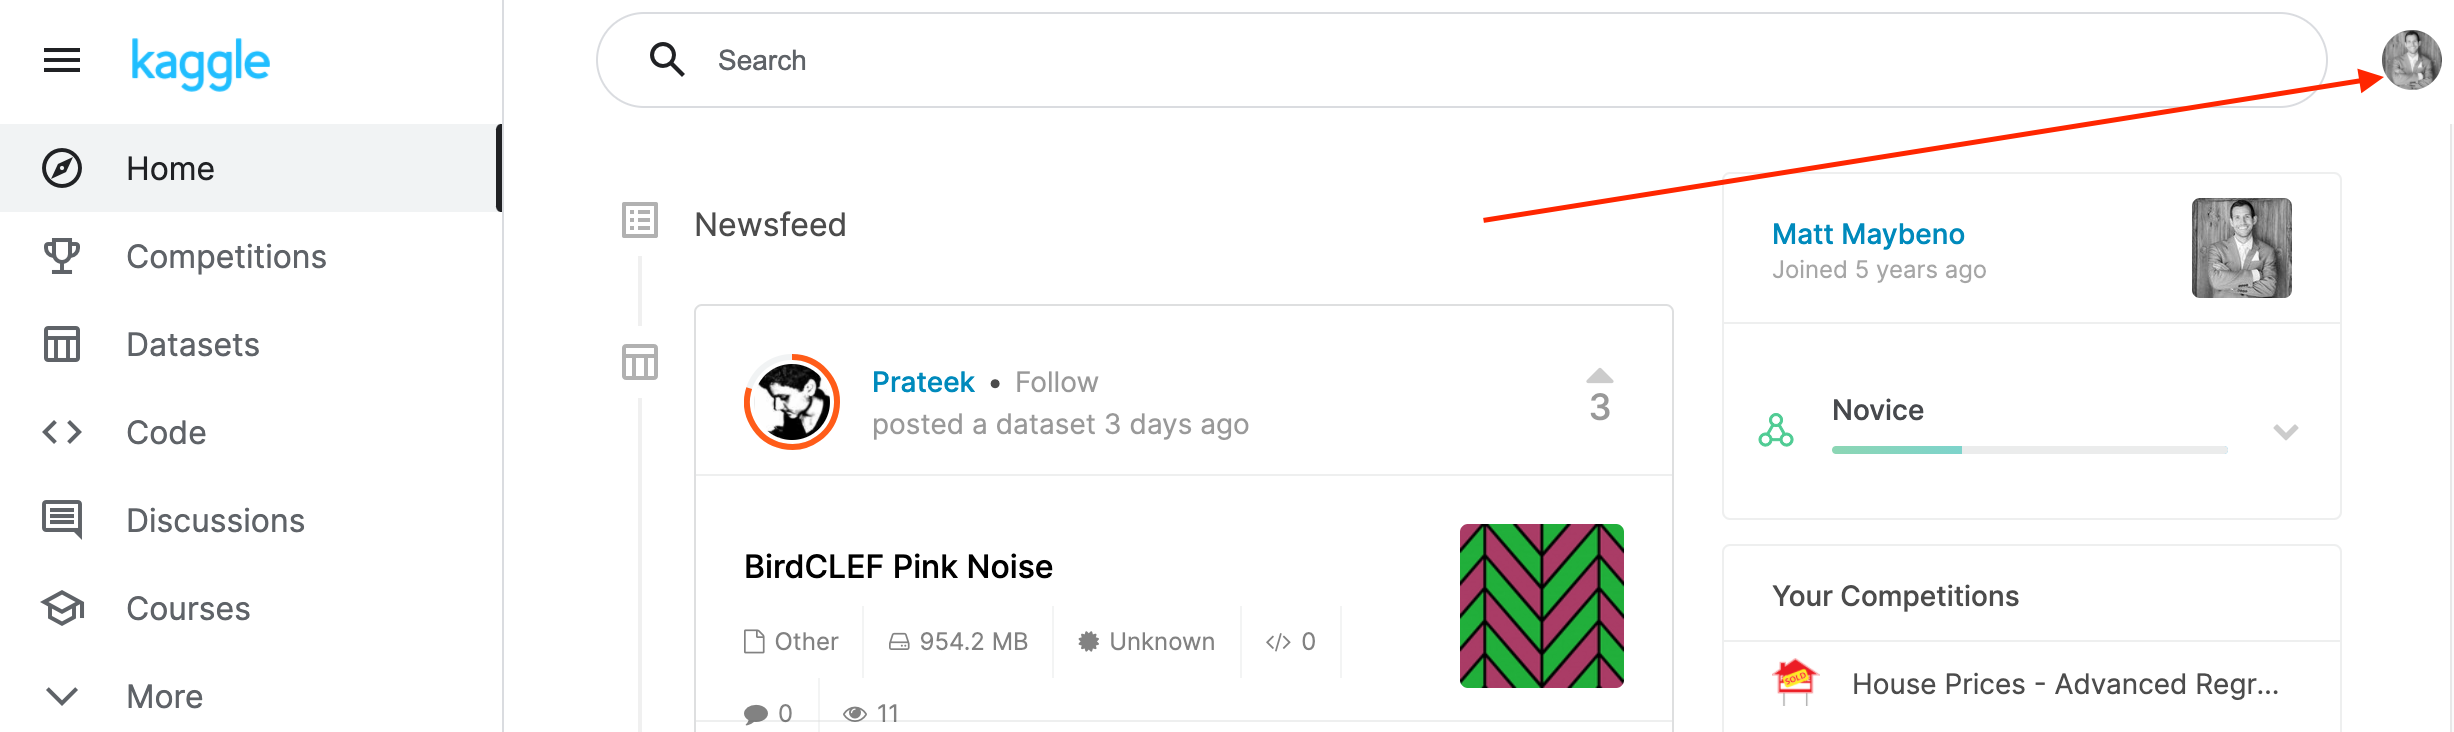
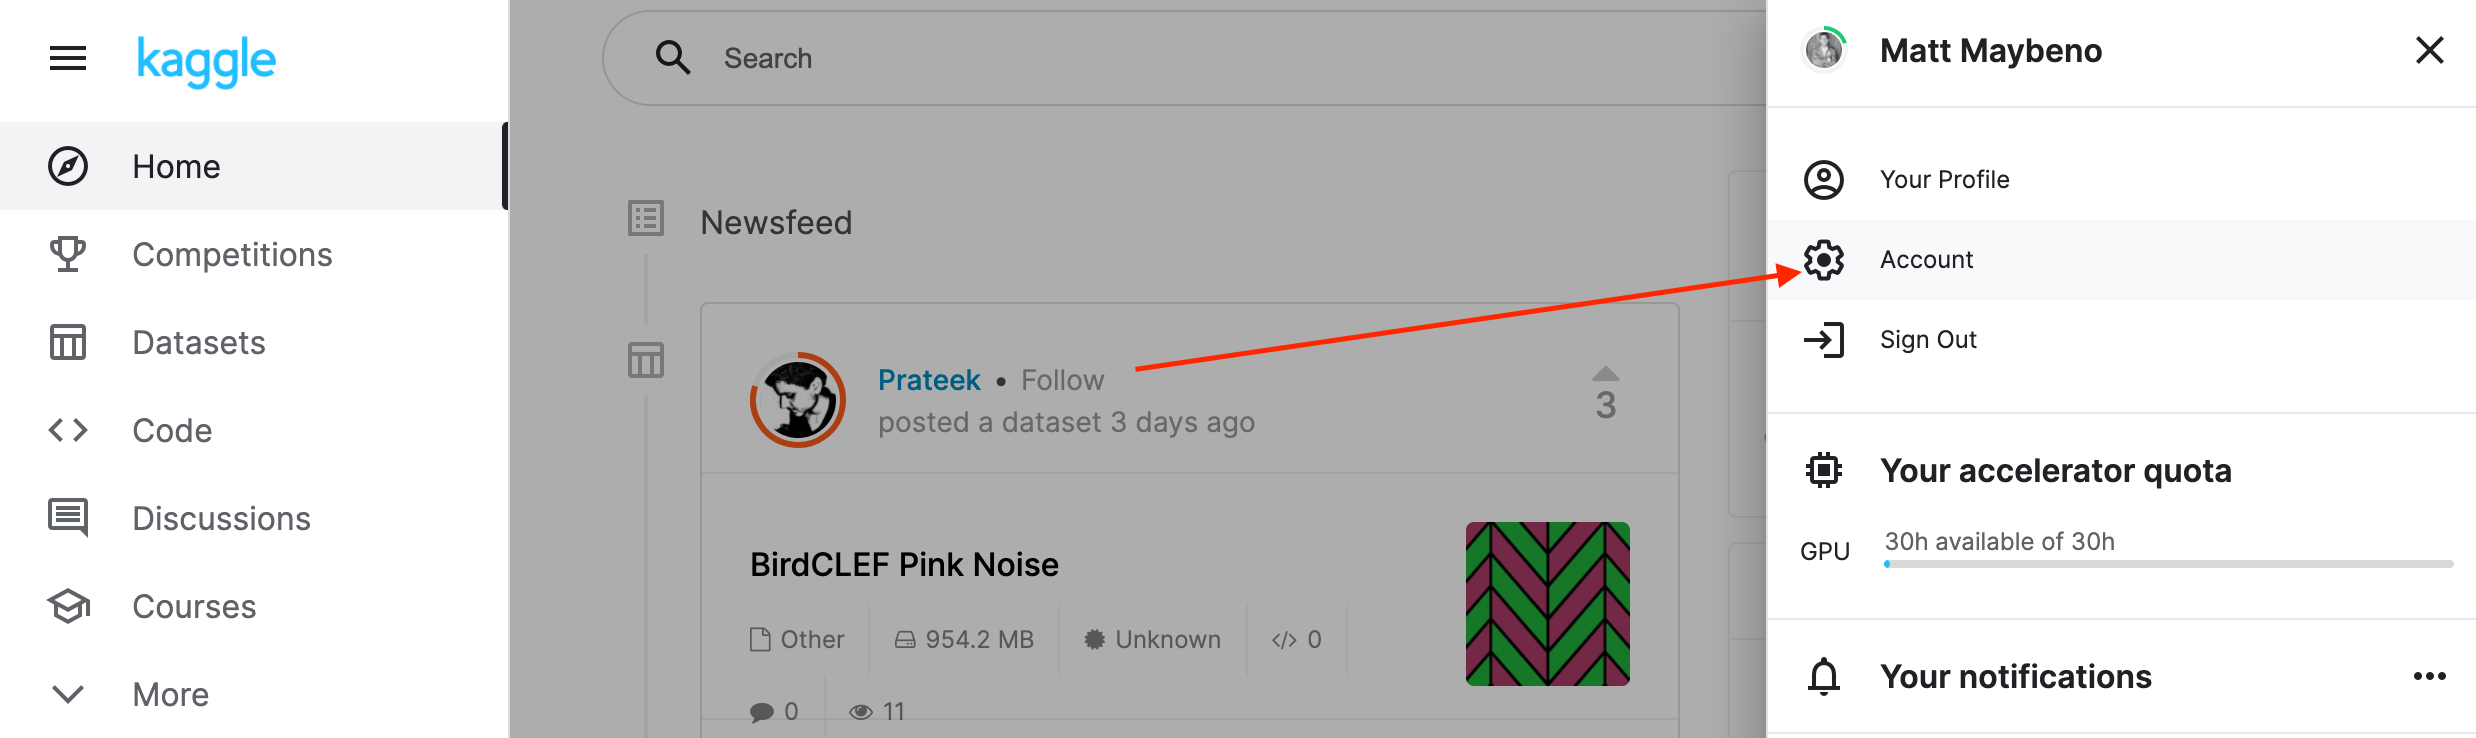
2. Scroll down to API and click Create New API Token.
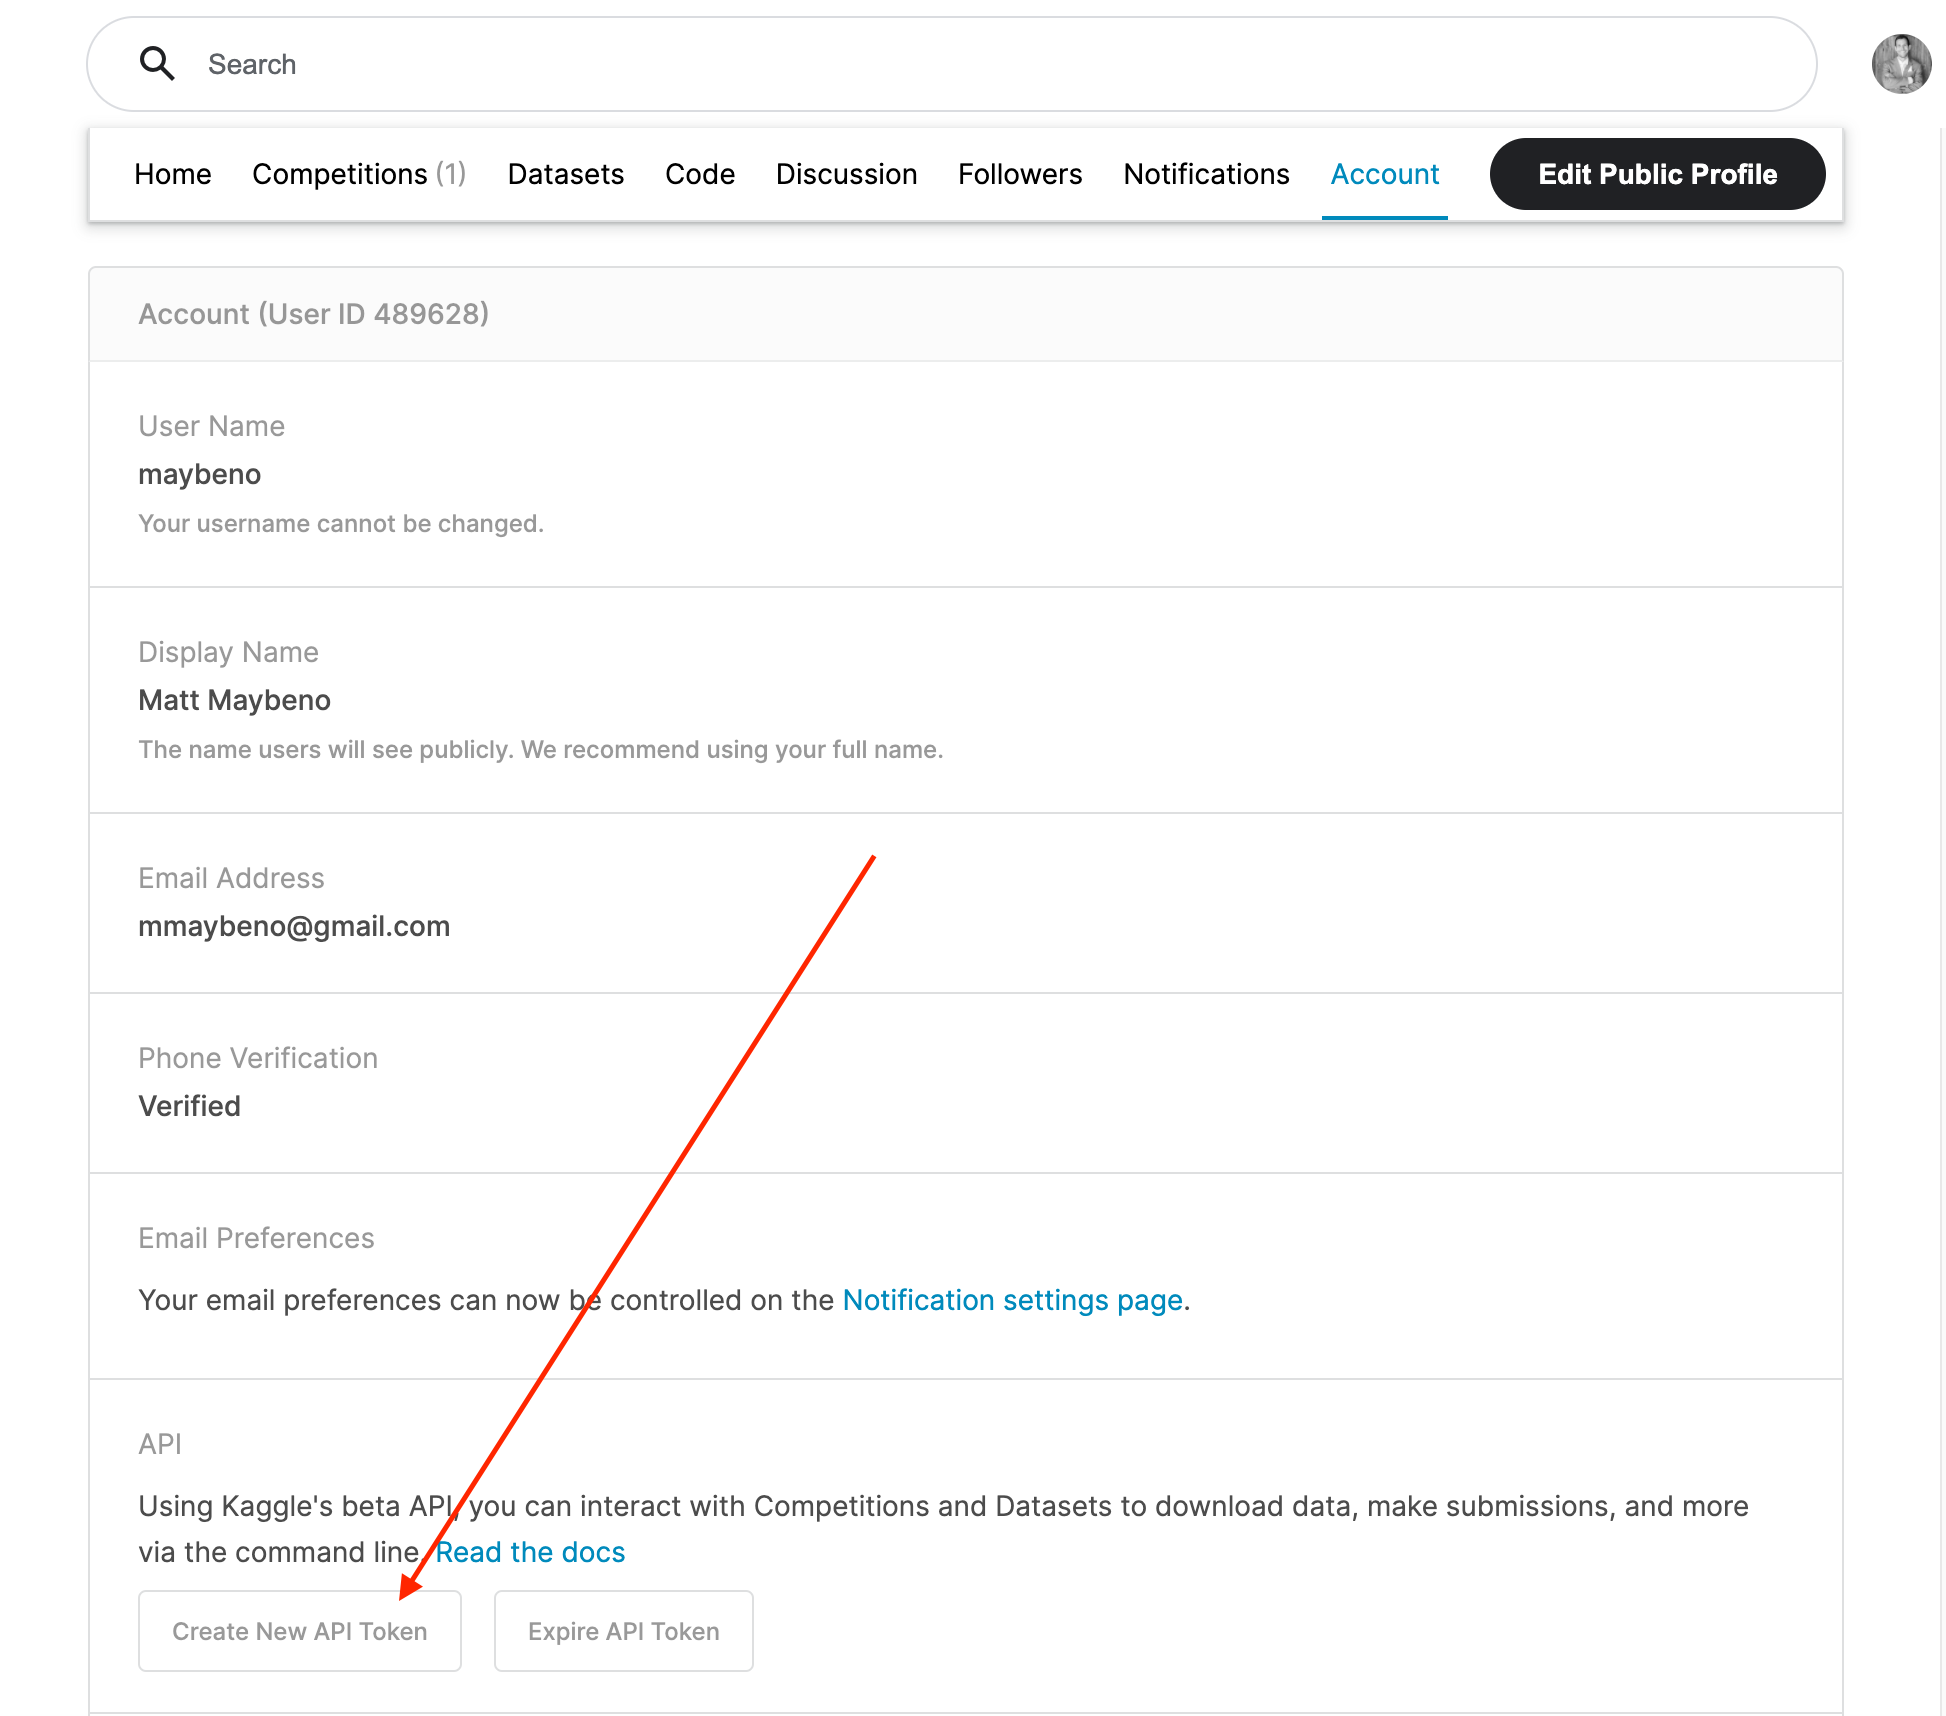
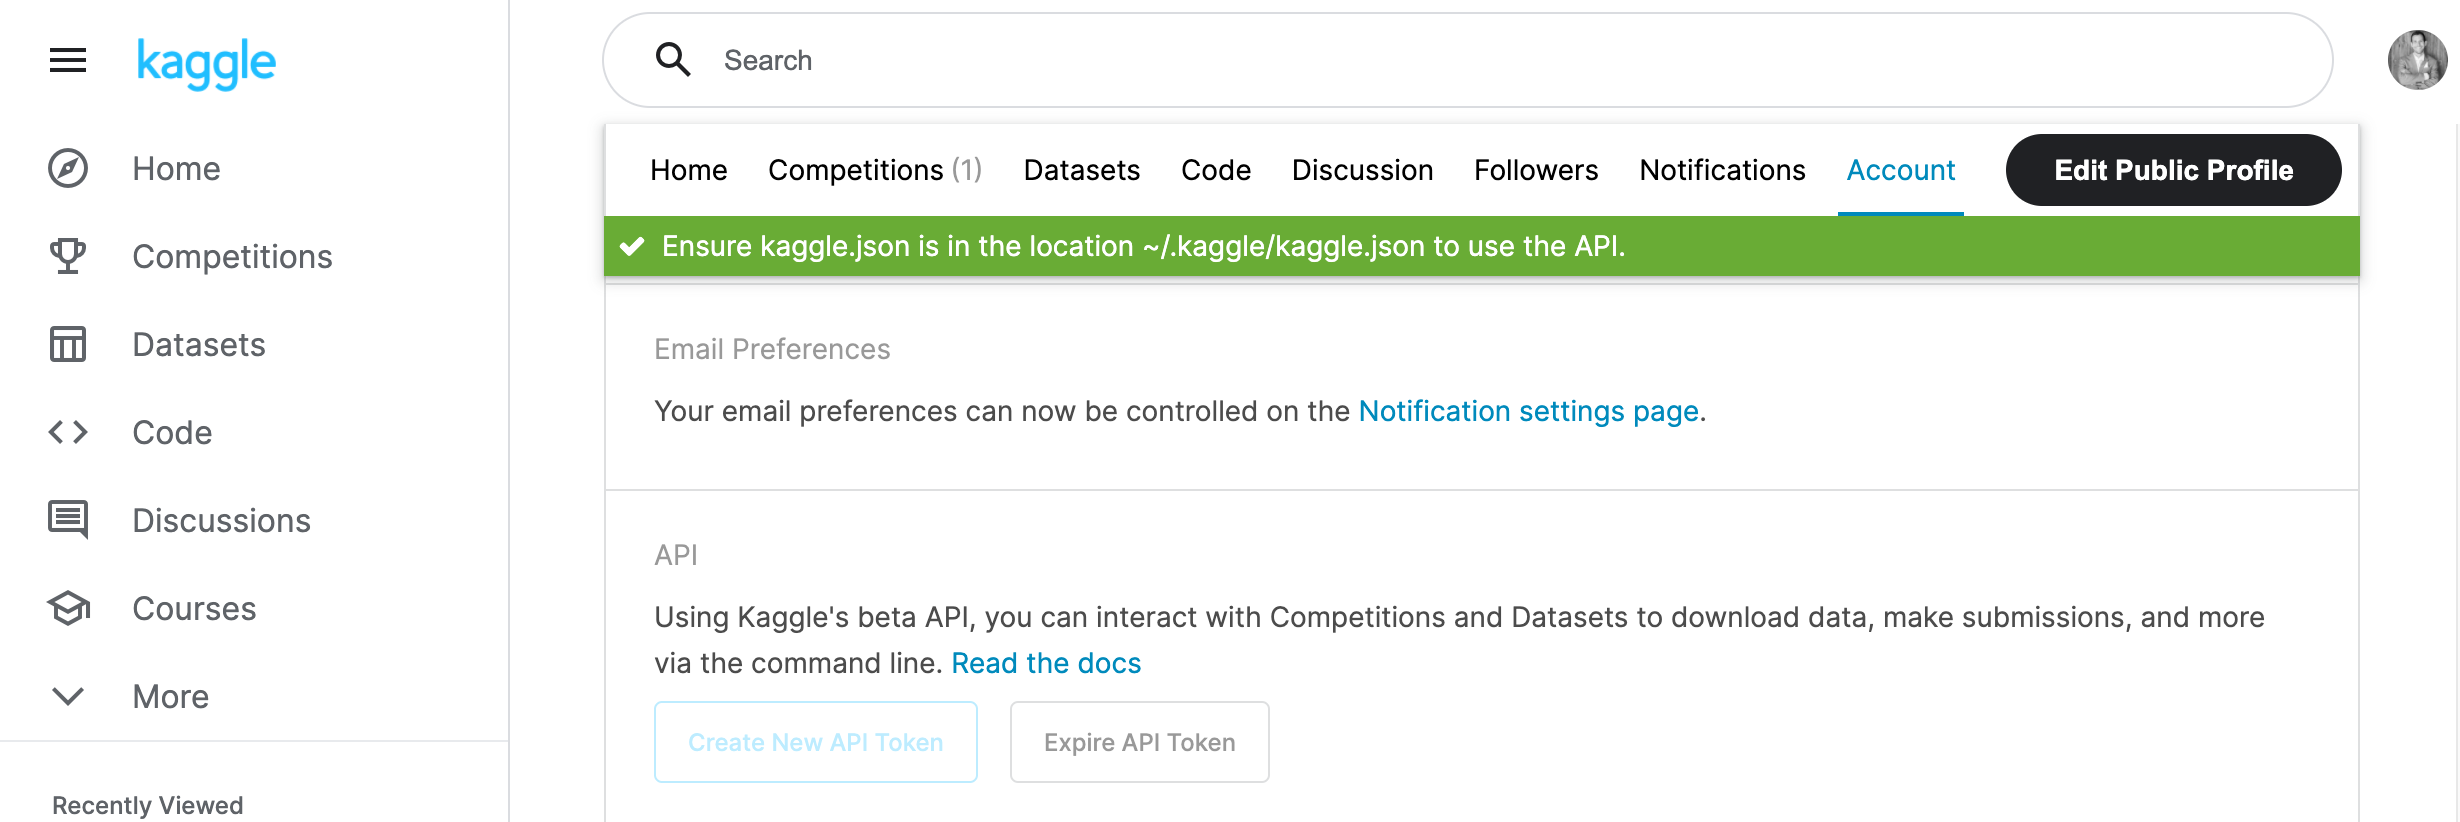
3. Open up `kaggle.json` and use the username and key.
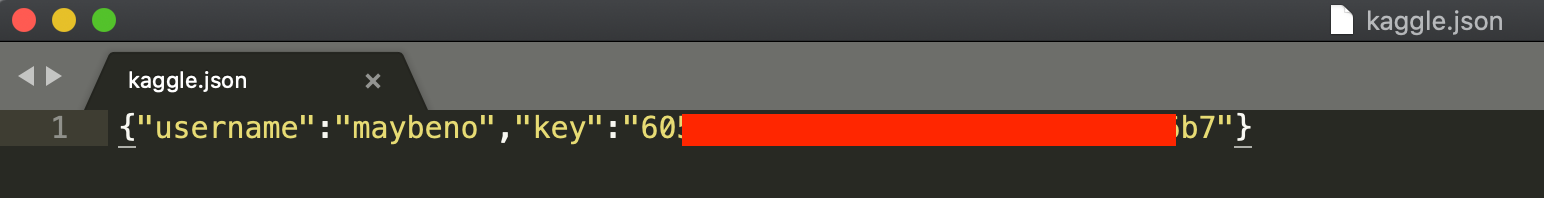

## Step 2: Download the Kaggle dataset using the kaggle python library

### Open up Sagemaker Studio and use starter template

1. Notebook should be using a `ml.t3.medium` instance (2 vCPU + 4 GiB)
2. Notebook should be using kernal: `Python 3 (MXNet 1.8 Python 3.7 CPU Optimized)`

### Install packages

In [1]:
!pip install -U pip
!pip install -U setuptools wheel
!pip install -U "mxnet<2.0.0" bokeh==2.0.1
!pip install autogluon --no-cache-dir
# Without --no-cache-dir, smaller aws instances may have trouble installing

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 33.5 MB/s eta 0:00:0000:01
  Attempting uninstall: pip
    Found existing installation: pip 24.1.2
    Uninstalling pip-24.1.2:
      Successfully uninstalled pip-24.1.2
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 30.8 MB/s eta 0:00:00
  Attempting uninstall: setuptools
    Found existing installation: setuptools 75.2.0
    Uninstalling setuptools-75.2.0:
      Successfully uninstalled setuptools-75.2.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pandas-gbq 0.28.0 requires google-api-core<3.0.0dev,>=2.10.2, but you have google-api-core 1.34.1 which is incompatible.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 97.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 85.5 MB/s eta 0:00:00:00:0100:01
  DEPRECATION: Buildi

### Setup Kaggle API Key

In [2]:
!pip install kaggle

In [3]:
# create the .kaggle directory and an empty kaggle.json file
# !mkdir -p /root/.kaggle
# !touch /root/.kaggle/kaggle.json
# !chmod 600 /root/.kaggle/kaggle.json


!mkdir -p  ~/.kaggle
!touch ~/.kaggle/kaggle.json
!chmod 600  ~/.kaggle/kaggle.json


In [4]:
# Fill in your user name and key from creating the kaggle account and API token file
# import json
# kaggle_username = "FILL_IN_USERNAME"
# kaggle_key = "FILL_IN_KEY"

# # Save API token the kaggle.json file
# with open("/root/.kaggle/kaggle.json", "w") as f:
#     f.write(json.dumps({"username": kaggle_username, "key": kaggle_key}))



import json
import os
kaggle_username = "atharezzeldin"
kaggle_key = "63a51d3002f03dcf2c76f9a908987d31"

# Save API token the kaggle.json file
kaggle_json_path = os.path.expanduser("~/.kaggle/kaggle.json")
with open(kaggle_json_path, "w") as f:
    f.write(json.dumps({"username": kaggle_username, "key": kaggle_key}))

### Download and explore dataset

### Go to the [bike sharing demand competition](https://www.kaggle.com/c/bike-sharing-demand) and agree to the terms
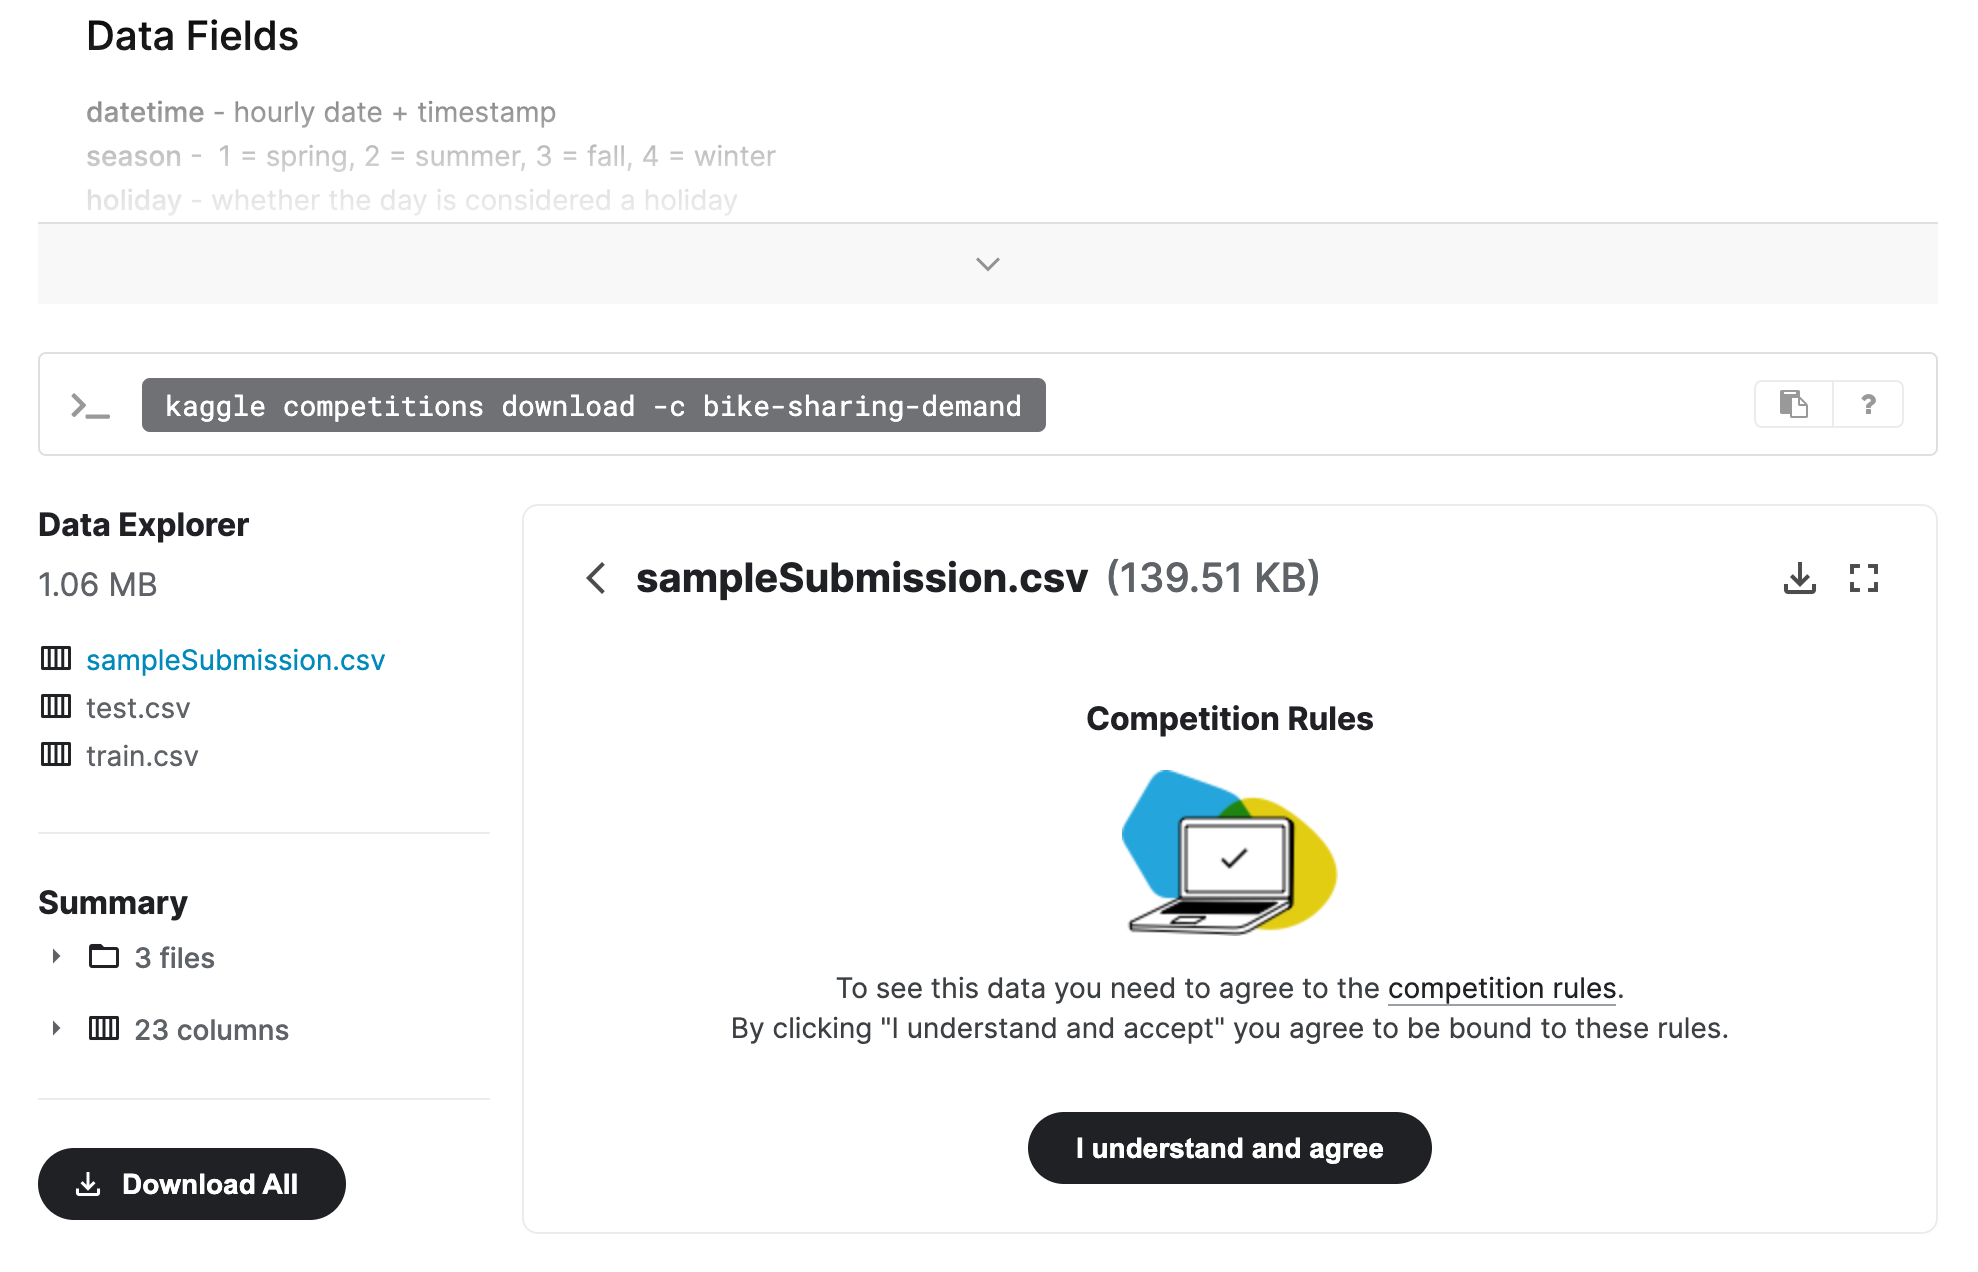

In [5]:
# # Download the dataset, it will be in a .zip file so you'll need to unzip it as well.
# !kaggle competitions download -c bike-sharing-demand
# # If you already downloaded it you can use the -o command to overwrite the file
# !unzip -o bike-sharing-demand.zip

In [6]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/bike-sharing-demand/sampleSubmission.csv
/kaggle/input/bike-sharing-demand/train.csv
/kaggle/input/bike-sharing-demand/test.csv


In [7]:
import pandas as pd
from autogluon.tabular import TabularPredictor

In [8]:
# Create the train dataset in pandas by reading the csv
# Set the parsing of the datetime column so you can use some of the `dt` features in pandas later
train = pd.read_csv("/kaggle/input/bike-sharing-demand/train.csv",parse_dates=['datetime'])
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [9]:
# Simple output of the train dataset to view some of the min/max/varition of the dataset features.
train.describe()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2011-12-27 05:56:22.399411968,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
min,2011-01-01 00:00:00,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2011-07-02 07:15:00,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,2012-01-01 20:30:00,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,2012-07-01 12:45:00,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,2012-12-19 23:00:00,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000
std,NaN,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454


In [10]:
# Create the test pandas dataframe in pandas by reading the csv, remember to parse the datetime!
test = pd.read_csv("/kaggle/input/bike-sharing-demand/test.csv",parse_dates=['datetime'])
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [11]:
# Same thing as train and test dataset
submission = pd.read_csv("/kaggle/input/bike-sharing-demand/sampleSubmission.csv", parse_dates=['datetime'])
submission.head()

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


## Step 3: Train a model using AutoGluon’s Tabular Prediction

Requirements:
* We are predicting `count`, so it is the label we are setting.
* Ignore `casual` and `registered` columns as they are also not present in the test dataset. 
* Use the `root_mean_squared_error` as the metric to use for evaluation.
* Set a time limit of 10 minutes (600 seconds).
* Use the preset `best_quality` to focus on creating the best model.

In [12]:
train = train.drop(columns=['casual', 'registered'])

In [13]:
predictor = TabularPredictor(label='count', eval_metric='rmse').fit(train_data= train, time_limit=600, presets='best_quality')

No path specified. Models will be saved in: "AutogluonModels/ag-20250529_152419"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.3.1
Python Version:     3.11.11
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Sun Nov 10 10:07:59 UTC 2024
CPU Count:          4
Memory Avail:       30.03 GB / 31.35 GB (95.8%)
Disk Space Avail:   19.50 GB / 19.52 GB (99.9%)
Presets specified: ['best_quality']
Setting dynamic_stacking from 'auto' to True. Reason: Enable dynamic_stacking when use_bag_holdout is disabled. (use_bag_holdout=False)
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
DyStack is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequence.
	This is used to identify the optimal `num_stack_levels` value. Copies of AutoGluon will be 

(_ray_fit pid=526) [1000]	valid_set's rmse: 129.692
(_ray_fit pid=665) [1000]	valid_set's rmse: 128.154 [repeated 6x across cluster] (Ray deduplicates logs by default. Set RAY_DEDUP_LOGS=0 to disable log deduplication, or see https://docs.ray.io/en/master/ray-observability/user-guides/configure-logging.html#log-deduplication for more options.)
(_ray_fit pid=696) [2000]	valid_set's rmse: 134.443 [repeated 5x across cluster]
(_ray_fit pid=696) [5000]	valid_set's rmse: 132.706 [repeated 11x across cluster]
(_ray_fit pid=665) [9000]	valid_set's rmse: 125.618 [repeated 11x across cluster]


(_dystack pid=308) 	-131.9758	 = Validation score   (-root_mean_squared_error)
(_dystack pid=308) 	42.61s	 = Training   runtime
(_dystack pid=308) 	8.85s	 = Validation runtime
(_dystack pid=308) Fitting model: LightGBM_BAG_L1 ... Training model for up to 41.79s of the 89.77s of remaining time.
(_dystack pid=308) 	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy (4 workers, per: cpus=1, gpus=0, memory=0.04%)


(_ray_fit pid=810) [1000]	valid_set's rmse: 129.285 [repeated 4x across cluster]
(_ray_fit pid=941) [1000]	valid_set's rmse: 124.896 [repeated 3x across cluster]


(_dystack pid=308) 	-131.8496	 = Validation score   (-root_mean_squared_error)
(_dystack pid=308) 	18.99s	 = Training   runtime
(_dystack pid=308) 	1.41s	 = Validation runtime
(_dystack pid=308) Fitting model: RandomForestMSE_BAG_L1 ... Training model for up to 18.35s of the 66.32s of remaining time.
(_dystack pid=308) /usr/local/lib/python3.11/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
(_dystack pid=308)   warnings.warn(
(_dystack pid=308) 	-119.5485	 = Validation score   (-root_mean_squared_error)
(_dystack pid=308) 	7.78s	 = Training   runtime
(_dystack pid=308) 	0.63s	 = Validation runtime
(_dystack pid=308) Fitting model: CatBoost_BAG_L1 ... Training model for up to 9.39s of the 57.36s of remaining time.
(_dystack pid=308) 	Fitting 8 child models (S1F1 - S1F8) | Fitti

(_ray_fit pid=1422) [1000]	valid_set's rmse: 68.6127 [repeated 4x across cluster]
(_ray_fit pid=1559) [1000]	valid_set's rmse: 76.547 [repeated 5x across cluster]


(_dystack pid=308) 	-73.0949	 = Validation score   (-root_mean_squared_error)
(_dystack pid=308) 	26.15s	 = Training   runtime
(_dystack pid=308) 	2.38s	 = Validation runtime
(_dystack pid=308) Fitting model: LightGBM_BAG_L2 ... Training model for up to 9.33s of the 9.29s of remaining time.
(_dystack pid=308) 	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy (4 workers, per: cpus=1, gpus=0, memory=0.05%)
(_ray_fit pid=1245) /usr/local/lib/python3.11/dist-packages/autogluon/common/utils/try_import.py:69: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81. [repeated 3x across cluster]
(_ray_fit pid=1245)   from pkg_resources import parse_version  # pylint: disable=import-outside-toplevel [repeated 3x across cluster]
(_ray_fit pid=1247) 	Ran out of time, early stoppi

### Review AutoGluon's training run with ranking of models that did the best.

In [14]:
predictor.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                     model   score_val              eval_metric  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L3  -53.131910  root_mean_squared_error      12.025720  350.603589                0.000729           0.041608            3       True         14
1   RandomForestMSE_BAG_L2  -53.487992  root_mean_squared_error      11.634771  288.406468                0.693289          21.970841            2       True         12
2          LightGBM_BAG_L2  -54.920516  root_mean_squared_error      11.251989  283.194402                0.310508          16.758774            2       True         11
3          CatBoost_BAG_L2  -55.669511  root_mean_squared_error      11.021194  311.832366                0.079713          45.396739            2       True         13
4        LightGBMXT_BAG_L2  -60.564987  root_mean_squared_error      14.794367  301.394324   

/usr/local/lib/python3.11/dist-packages/autogluon/core/utils/plots.py:169: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  warnings.warn('AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"')


{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L1': 'StackerEnsembleModel_XT',
  'NeuralNetFastAI_BAG_L1': 'StackerEnsembleModel_NNFastAiTabular',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBMXT_BAG_L2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L2': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L2': 'StackerEnsembleModel_CatBoost',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif_BAG_L1': -101.56118165528414,
  'KNeighborsDist_BAG_L1': -84.13501071997395,
  'LightGBMXT_BAG_L1': -131.46090891834504,
  'LightGBM_BAG_L1': -131.054161598899,
  'RandomForestMSE_BAG_L1': -116.54

In [15]:
lb = predictor.leaderboard(extra_info=True)
print(lb[['model', 'score_val', 'can_infer', 'fit_order', 'stack_level']])

                     model   score_val  can_infer  fit_order  stack_level
0      WeightedEnsemble_L3  -53.131910       True         14            3
1   RandomForestMSE_BAG_L2  -53.487992       True         12            2
2          LightGBM_BAG_L2  -54.920516       True         11            2
3          CatBoost_BAG_L2  -55.669511       True         13            2
4        LightGBMXT_BAG_L2  -60.564987       True         10            2
5    KNeighborsDist_BAG_L1  -84.135011       True          2            1
6      WeightedEnsemble_L2  -84.135011       True          9            2
7    KNeighborsUnif_BAG_L1 -101.561182       True          1            1
8   RandomForestMSE_BAG_L1 -116.548359       True          5            1
9     ExtraTreesMSE_BAG_L1 -124.600676       True          7            1
10         CatBoost_BAG_L1 -130.472284       True          6            1
11         LightGBM_BAG_L1 -131.054162       True          4            1
12       LightGBMXT_BAG_L1 -131.460909

<Axes: xlabel='model'>

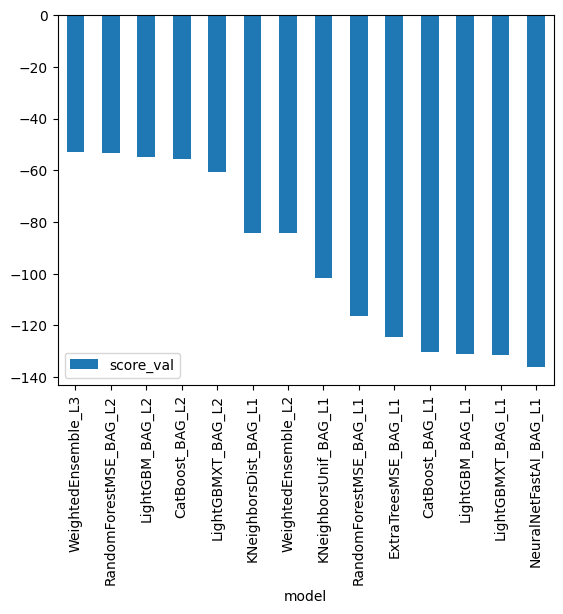

In [16]:
predictor.leaderboard(silent= True).plot(kind='bar', x='model' , y='score_val' )

In [17]:
feature_importance = predictor.feature_importance(data=train)
feature_importance

Computing feature importance via permutation shuffling for 9 features using 5000 rows with 5 shuffle sets...
	811.52s	= Expected runtime (162.3s per shuffle set)
	761.41s	= Actual runtime (Completed 5 of 5 shuffle sets)


,importance,stddev,p_value,n,p99_high,p99_low
datetime,197.173328,3.630352,1.378438e-08,5,204.648272,189.698383
holiday,0.000677,0.011344,4.501150e-01,5,0.024036,-0.022681
season,-0.201334,0.084502,9.970126e-01,5,-0.027342,-0.375326
weather,-0.640814,0.182591,9.992879e-01,5,-0.264856,-1.016772
workingday,-1.634964,0.218085,9.999629e-01,5,-1.185924,-2.084004
windspeed,-1.770874,0.159866,9.999921e-01,5,-1.441708,-2.100040
temp,-2.064699,0.324770,9.999289e-01,5,-1.395992,-2.733406
atemp,-2.240997,0.318438,9.999524e-01,5,-1.585329,-2.896665
humidity,-2.508216,0.119699,9.999994e-01,5,-2.261754,-2.754679


### Create predictions from test dataset

In [18]:
predictions = predictor.predict(test)
predictions.head()

0    22.946648
1    41.671761
2    47.406792
3    50.033070
4    52.383942
Name: count, dtype: float32

#### NOTE: Kaggle will reject the submission if we don't set everything to be > 0.

In [19]:
# Describe the `predictions` series to see if there are any negative values
predictions.describe()

count    6493.000000
mean      100.029381
std        89.307449
min         3.099741
25%        19.700922
50%        64.828964
75%       165.747528
max       362.063721
Name: count, dtype: float64

In [20]:
# How many negative values do we have?
negative_counts= predictions [predictions <0 ].count()
negative_counts

0

In [21]:
# Set them to zero
predictions = predictions.clip(lower=0)

In [22]:
predictions.describe()

count    6493.000000
mean      100.029381
std        89.307449
min         3.099741
25%        19.700922
50%        64.828964
75%       165.747528
max       362.063721
Name: count, dtype: float64

### Set predictions to submission dataframe, save, and submit

In [23]:
submission["count"] = predictions
submission.to_csv("submission.csv", index=False)

In [24]:
!kaggle competitions submit -c bike-sharing-demand -f submission.csv -m "first raw submission"

100%|█████████████████████████████████████████| 188k/188k [00:00<00:00, 303kB/s]
Successfully submitted to Bike Sharing Demand

#### View submission via the command line or in the web browser under the competition's page - `My Submissions`

In [25]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                     date                        description                               status                     publicScore  privateScore  
---------------------------  --------------------------  ----------------------------------------  -------------------------  -----------  ------------  
submission.csv               2025-05-29 15:48:01.340000  first raw submission                      SubmissionStatus.PENDING                              
submission.csv               2025-05-29 14:18:38.597000  first raw submission                      SubmissionStatus.COMPLETE  1.79791      1.79791       
submission_new_hpo.csv       2025-05-29 13:18:15.267000  new features with hyperparameters         SubmissionStatus.COMPLETE  0.50686      0.50686       
submission_new_features.csv  2025-05-29 13:04:32.683000  new features                              SubmissionStatus.COMPLETE  0.54854      0.54854       
tail: write error: Broken pipe


#### Initial score of `Score: 1.80342`

## Step 4: Exploratory Data Analysis and Creating an additional feature
* Any additional feature will do, but a great suggestion would be to separate out the datetime into hour, day, or month parts.

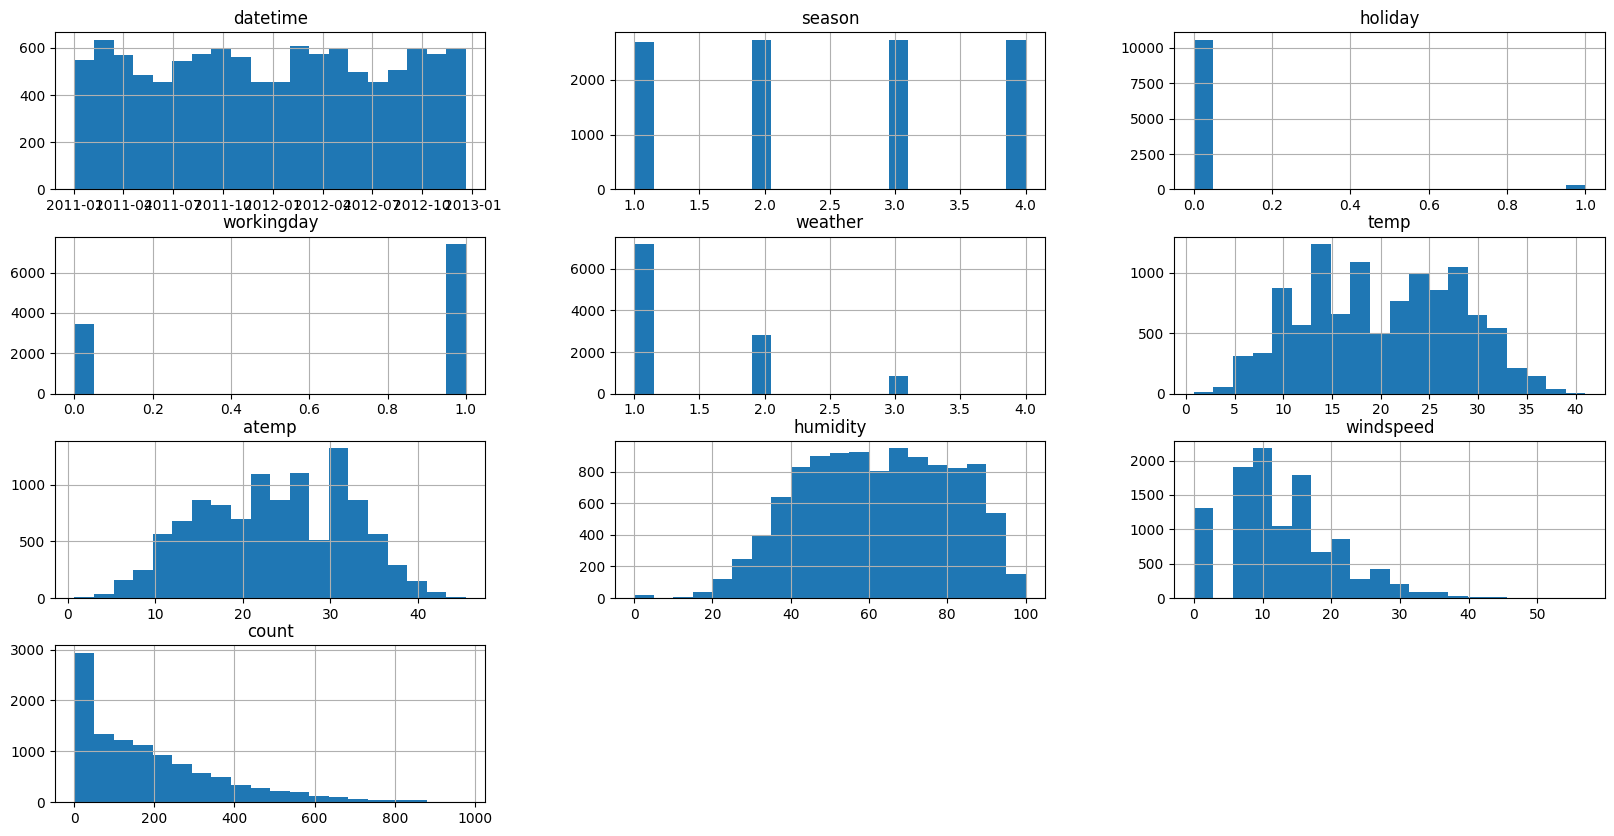

In [26]:
# Create a histogram of all features to show the distribution of each one relative to the data. This is part of the exploritory data analysis
train.hist(bins= 20, figsize=(20,10));

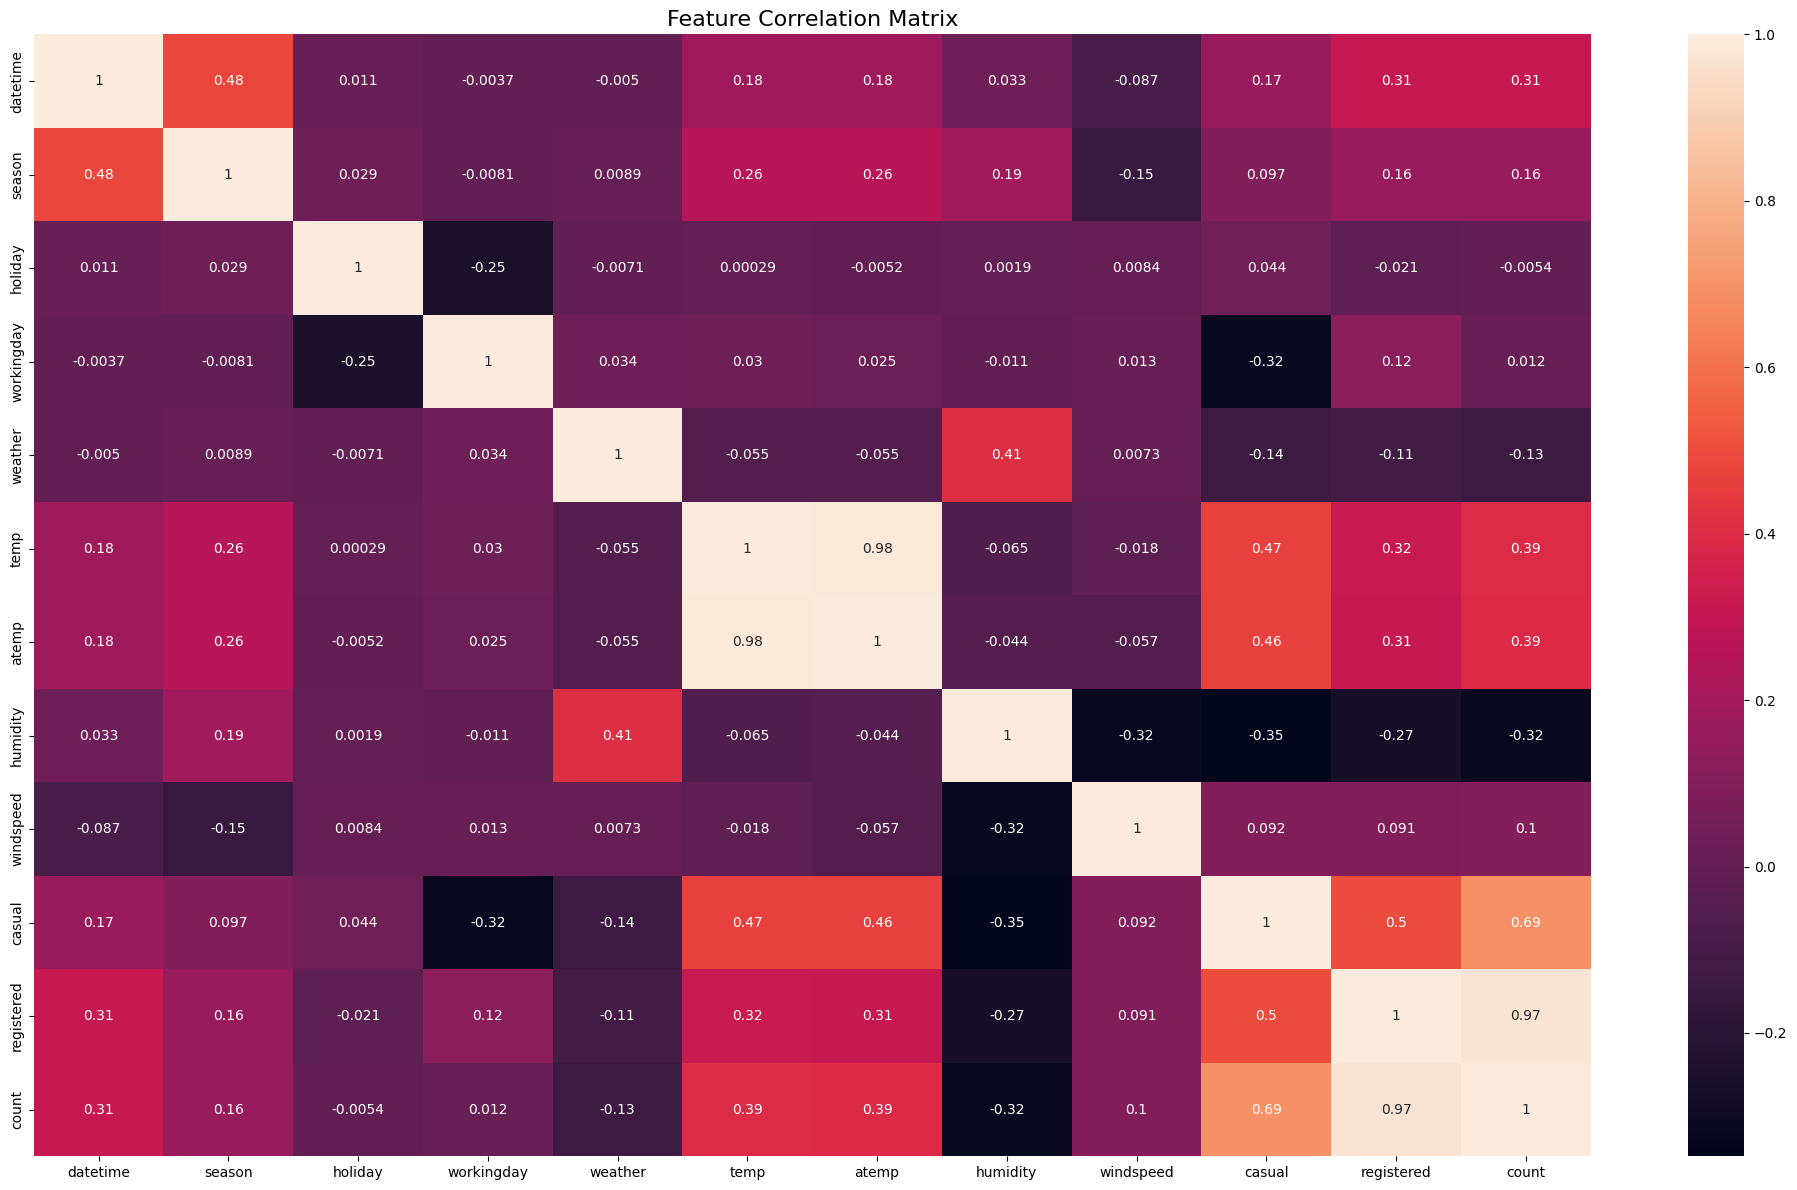

In [83]:
import seaborn as sns
import matplotlib.pyplot as plt


corr_matrix = train.corr()


plt.figure(figsize=(20, 12))

sns.heatmap(corr_matrix, annot=True)

plt.title("Feature Correlation Matrix", fontsize=16)
plt.tight_layout()
plt.show()

In [27]:
# create a new feature

train['month'] = train['datetime'].dt.month
train['day'] = train['datetime'].dt.day
train['hour'] = train['datetime'].dt.hour

train = train.drop(columns=['datetime'])




test['month'] = test['datetime'].dt.month
test['day'] = test['datetime'].dt.day
test['hour'] = test['datetime'].dt.hour

test = test.drop(columns=['datetime'])

In [28]:
train.holiday.value_counts()

holiday
0    10575
1      311
Name: count, dtype: int64

In [29]:
train.workingday.value_counts()

workingday
1    7412
0    3474
Name: count, dtype: int64

## Make category types for these so models know they are not just numbers
* AutoGluon originally sees these as ints, but in reality they are int representations of a category.
* Setting the dtype to category will classify these as categories in AutoGluon.

In [30]:
train["season"] = train["season"].astype('category')
train["weather"] = train['weather'].astype('category')
train["holiday"]= train["holiday"].astype('category')
train["workingday"]= train["workingday"].astype('category')


test["season"] = test['season'].astype('category')
test["weather"] = test['weather'].astype('category')
test["holiday"]= test["holiday"].astype('category')
test['workingday']= test['workingday'].astype('category')

In [31]:
# train.windspeed.value_counts()

In [32]:
# train.windspeed.describe()


In [33]:
# def categorize_windspeed(speed):
#     if speed < 7:
#         return 'low_wind'
#     elif 7 <= speed <= 17:
#         return 'moderate_wind'
#     else:
#         return 'high_wind'
# train['wind_category'] = train['windspeed'].apply(categorize_windspeed)
# test['wind_category'] = test['windspeed'].apply(categorize_windspeed)

In [34]:
# def categorize_hour(hour):
#     if 7 <= hour <= 9: return 'morning_rush'
#     elif 11 <= hour <= 13: return 'lunch_rush'
#     elif 17 <= hour <= 19: return 'evening_rush'
#     else: return 'off_peak'

# train['hour_category'] = train['hour'].apply(categorize_hour)
# test['hour_category'] = test['hour'].apply(categorize_hour)

In [35]:
# train['wind_category'].value_counts(normalize=True)

In [36]:
# train.temp.describe()

In [37]:
# def categorize_temperature(temp):
#     if temp < 13.94:
#         return 'cold'
#     elif 13.94 <= temp <= 26.24:
#         return 'mild'
#     else:
#         return 'hot'

# # Apply to both train and test datasets
# train['temp_category'] = train['temp'].apply(categorize_temperature)
# test['temp_category'] = test['temp'].apply(categorize_temperature)

In [38]:
# train.humidity.describe()

In [39]:
# def categorize_humidity(humidity):
#     if humidity < 47:
#         return 'low_humidity'
#     elif 47 <= humidity <= 77:
#         return 'moderate_humidity'
#     else:
#         return 'high_humidity'

# # Apply to both train and test datasets
# train['humidity_category'] = train['humidity'].apply(categorize_humidity)
# test['humidity_category'] = test['humidity'].apply(categorize_humidity)

In [40]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      10886 non-null  category
 1   holiday     10886 non-null  category
 2   workingday  10886 non-null  category
 3   weather     10886 non-null  category
 4   temp        10886 non-null  float64 
 5   atemp       10886 non-null  float64 
 6   humidity    10886 non-null  int64   
 7   windspeed   10886 non-null  float64 
 8   count       10886 non-null  int64   
 9   month       10886 non-null  int32   
 10  day         10886 non-null  int32   
 11  hour        10886 non-null  int32   
dtypes: category(4), float64(3), int32(3), int64(2)
memory usage: 596.1 KB


In [41]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      6493 non-null   category
 1   holiday     6493 non-null   category
 2   workingday  6493 non-null   category
 3   weather     6493 non-null   category
 4   temp        6493 non-null   float64 
 5   atemp       6493 non-null   float64 
 6   humidity    6493 non-null   int64   
 7   windspeed   6493 non-null   float64 
 8   month       6493 non-null   int32   
 9   day         6493 non-null   int32   
 10  hour        6493 non-null   int32   
dtypes: category(4), float64(3), int32(3), int64(1)
memory usage: 305.1 KB


In [42]:
# View are new feature
train.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,month,day,hour
0,1,0,0,1,9.84,14.395,81,0.0,16,1,1,0
1,1,0,0,1,9.02,13.635,80,0.0,40,1,1,1
2,1,0,0,1,9.02,13.635,80,0.0,32,1,1,2
3,1,0,0,1,9.84,14.395,75,0.0,13,1,1,3
4,1,0,0,1,9.84,14.395,75,0.0,1,1,1,4


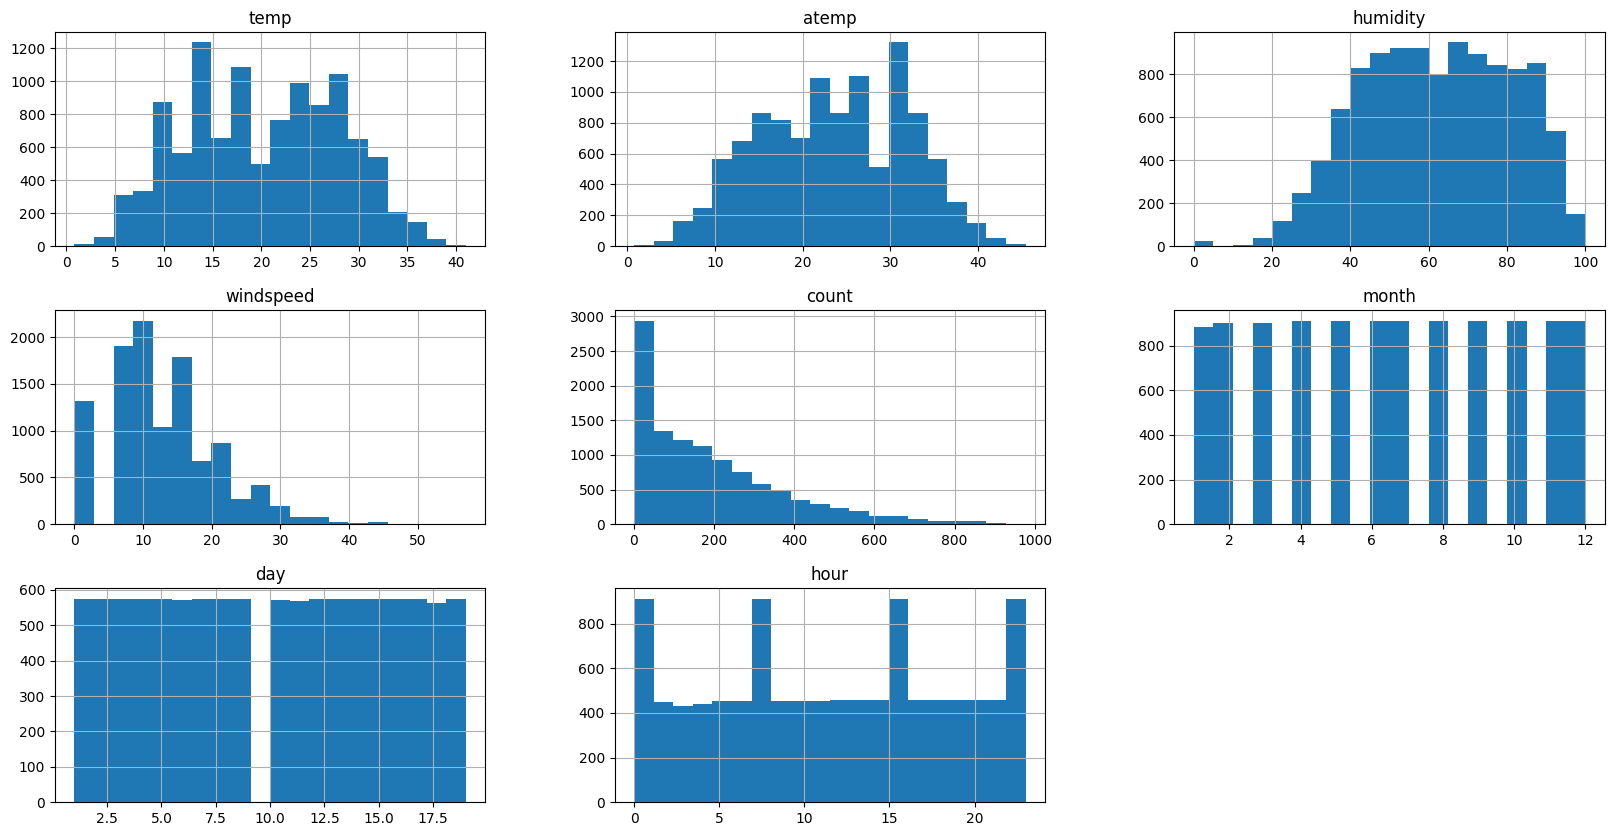

In [43]:
# View histogram of all features again now with the hour feature

train.hist(bins=20, figsize=(20, 10));

## Step 5: Rerun the model with the same settings as before, just with more features

In [44]:
predictor_new_features = TabularPredictor(label='count', eval_metric='rmse').fit(train_data= train, 
                                                                    time_limit=600, 
                                                                    presets='best_quality')




No path specified. Models will be saved in: "AutogluonModels/ag-20250529_154807"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.3.1
Python Version:     3.11.11
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Sun Nov 10 10:07:59 UTC 2024
CPU Count:          4
Memory Avail:       28.65 GB / 31.35 GB (91.4%)
Disk Space Avail:   18.49 GB / 19.52 GB (94.7%)
Presets specified: ['best_quality']
Setting dynamic_stacking from 'auto' to True. Reason: Enable dynamic_stacking when use_bag_holdout is disabled. (use_bag_holdout=False)
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
DyStack is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequence.
	This is used to identify the optimal `num_stack_levels` value. Copies of AutoGluon will be 

In [45]:
predictor_new_features.fit_summary()

/usr/local/lib/python3.11/dist-packages/autogluon/core/utils/plots.py:169: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  warnings.warn('AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"')


*** Summary of fit() ***
Estimated performance of each model:
                     model   score_val              eval_metric  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L3  -49.836921  root_mean_squared_error      60.527344  340.209304                0.000752           0.046312            3       True         14
1   RandomForestMSE_BAG_L2  -50.354582  root_mean_squared_error      60.182749  291.686748                0.825030          23.191229            2       True         12
2          CatBoost_BAG_L2  -50.467882  root_mean_squared_error      59.488728  300.130806                0.131009          31.635287            2       True         13
3          LightGBM_BAG_L2  -50.878370  root_mean_squared_error      59.570553  285.336477                0.212833          16.840958            2       True         11
4      WeightedEnsemble_L2  -51.363480  root_mean_squared_error      57.310364  228.750948   

{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L1': 'StackerEnsembleModel_XT',
  'NeuralNetFastAI_BAG_L1': 'StackerEnsembleModel_NNFastAiTabular',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBMXT_BAG_L2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L2': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L2': 'StackerEnsembleModel_CatBoost',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif_BAG_L1': -123.9793056989999,
  'KNeighborsDist_BAG_L1': -119.40090503683403,
  'LightGBMXT_BAG_L1': -52.6894865266179,
  'LightGBM_BAG_L1': -53.032787781968544,
  'RandomForestMSE_BAG_L1': -64.174

<Axes: xlabel='model'>

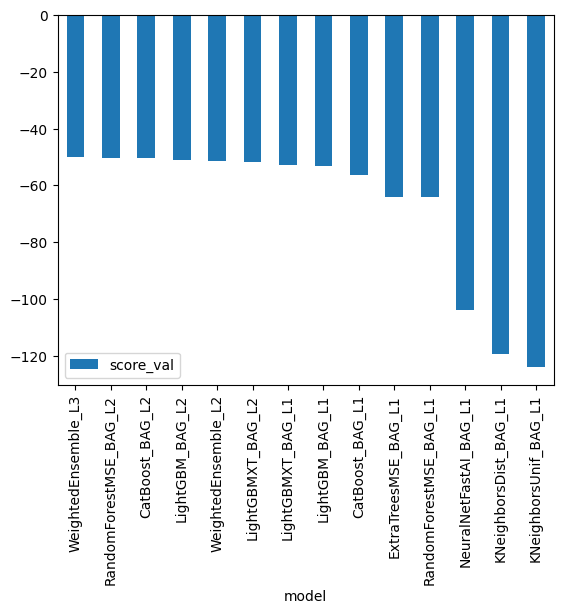

In [72]:
predictor_new_features.leaderboard(silent= True).plot(kind='bar', x='model' , y='score_val' )

In [46]:
predictions_new_features = predictor_new_features.predict(test)
predictions_new_features.head()

0    30.742781
1     5.906176
2     4.923909
3     4.415863
4     4.418550
Name: count, dtype: float32

In [47]:
predictions_new_features.describe()


count    6493.000000
mean      188.332092
std       164.914841
min        -3.664224
25%        48.482277
50%       151.932709
75%       274.054016
max       808.969604
Name: count, dtype: float64

In [48]:
# Remember to set all negative values to zero
predictions_new_features = predictions_new_features.clip(lower=0)

In [49]:
predictions_new_features.describe()

count    6493.000000
mean      188.337646
std       164.908569
min         0.000000
25%        48.482277
50%       151.932709
75%       274.054016
max       808.969604
Name: count, dtype: float64

In [50]:
# Same submitting predictions
# submission_new_features = pd.read_csv('sampleSubmission.csv', parse_dates=['datetime'])
submission_new_features = pd.read_csv("/kaggle/input/bike-sharing-demand/sampleSubmission.csv", parse_dates=['datetime'])
submission_new_features["count"] = predictions_new_features
submission_new_features.to_csv("submission_new_features.csv", index=False)





In [51]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_features.csv -m "new features"

100%|█████████████████████████████████████████| 188k/188k [00:00<00:00, 314kB/s]
Successfully submitted to Bike Sharing Demand

In [52]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                     date                        description                               status                     publicScore  privateScore  
---------------------------  --------------------------  ----------------------------------------  -------------------------  -----------  ------------  
submission_new_features.csv  2025-05-29 15:59:32.247000  new features                              SubmissionStatus.COMPLETE  0.56802      0.56802       
submission.csv               2025-05-29 15:48:01.340000  first raw submission                      SubmissionStatus.COMPLETE  1.79738      1.79738       
submission.csv               2025-05-29 14:18:38.597000  first raw submission                      SubmissionStatus.COMPLETE  1.79791      1.79791       
submission_new_hpo.csv       2025-05-29 13:18:15.267000  new features with hyperparameters         SubmissionStatus.COMPLETE  0.50686      0.50686       
tail: write error: Broken pipe


#### New Score of `0.56030`

## Step 6: Hyper parameter optimization
* There are many options for hyper parameter optimization.
* Options are to change the AutoGluon higher level parameters or the individual model hyperparameters.
* The hyperparameters of the models themselves that are in AutoGluon. Those need the `hyperparameter` and `hyperparameter_tune_kwargs` arguments.

In [53]:
hyperparameters = {
   
    'RF': [
        {'criterion': 'squared_error', 'n_estimators': 500, 'max_depth': 15, 'max_features': 0.8, 'min_samples_leaf': 2},
        {'criterion': 'friedman_mse', 'n_estimators': 400, 'max_depth': 12, 'max_features': 0.9, 'min_samples_split': 5},
        {'criterion': 'squared_error', 'n_estimators': 600, 'max_depth': None, 'max_features': 0.7, 'min_samples_leaf': 1},
    ],
    'XT': [
        # Extra Trees for additional diversity
        {'n_estimators': 500, 'max_depth': 15, 'max_features': 0.8, 'min_samples_leaf': 2},
        {'n_estimators': 400, 'max_depth': 12, 'max_features': 0.9, 'min_samples_split': 3},
    ]
}

# Enhanced hyperparameter tuning configuration
hyperparameter_tune_kwargs = {
    'searcher': 'bayes',          
    'scheduler': 'local',
    'num_trials': 80,               
    'max_reward': None,             
    'nthreads_per_trial': 4,        
    'search_strategy': 'auto'       
}


predictor_new_hpo = TabularPredictor(
    label="count", 
    problem_type="regression", 
    eval_metric="rmse"
).fit(
    train, 
    time_limit=900, 
     
    presets="best_quality",
    hyperparameters=hyperparameters,
    hyperparameter_tune_kwargs=hyperparameter_tune_kwargs, 
    num_bag_folds=7,  # Ensures robust validation by training on different subsets
    num_stack_levels=7,  # Increase stacking depth

)

No path specified. Models will be saved in: "AutogluonModels/ag-20250529_155934"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.3.1
Python Version:     3.11.11
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Sun Nov 10 10:07:59 UTC 2024
CPU Count:          4
Memory Avail:       28.39 GB / 31.35 GB (90.5%)
Disk Space Avail:   17.35 GB / 19.52 GB (88.9%)
Presets specified: ['best_quality']
Setting dynamic_stacking from 'auto' to True. Reason: Enable dynamic_stacking when use_bag_holdout is disabled. (use_bag_holdout=False)
Stack configuration (auto_stack=True): num_stack_levels=7, num_bag_folds=7, num_bag_sets=1
DyStack is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequence.
	This is used to identify the optimal `num_stack_levels` value. Copies of AutoGluon will be 

In [54]:
predictor_new_hpo.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                    model  score_val              eval_metric  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0     WeightedEnsemble_L9 -60.289317  root_mean_squared_error       6.449038   56.775825                0.000713           0.027385            9       True         48
1     WeightedEnsemble_L3 -60.289317  root_mean_squared_error       6.449118   56.767936                0.000793           0.019496            3       True         12
2       ExtraTrees_BAG_L2 -60.451647  root_mean_squared_error       4.970744   36.707421                0.816961           4.847797            2       True         10
3     ExtraTrees_2_BAG_L2 -60.485961  root_mean_squared_error       4.732052   35.264756                0.578269           3.405132            2       True         11
4     RandomForest_BAG_L2 -60.703110  root_mean_squared_error       5.053094   48.495511               

/usr/local/lib/python3.11/dist-packages/autogluon/core/utils/plots.py:169: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  warnings.warn('AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"')


{'model_types': {'RandomForest_BAG_L1': 'StackerEnsembleModel_RF',
  'RandomForest_2_BAG_L1': 'StackerEnsembleModel_RF',
  'RandomForest_3_BAG_L1': 'StackerEnsembleModel_RF',
  'ExtraTrees_BAG_L1': 'StackerEnsembleModel_XT',
  'ExtraTrees_2_BAG_L1': 'StackerEnsembleModel_XT',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'RandomForest_BAG_L2': 'StackerEnsembleModel_RF',
  'RandomForest_2_BAG_L2': 'StackerEnsembleModel_RF',
  'RandomForest_3_BAG_L2': 'StackerEnsembleModel_RF',
  'ExtraTrees_BAG_L2': 'StackerEnsembleModel_XT',
  'ExtraTrees_2_BAG_L2': 'StackerEnsembleModel_XT',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel',
  'RandomForest_BAG_L3': 'StackerEnsembleModel_RF',
  'RandomForest_2_BAG_L3': 'StackerEnsembleModel_RF',
  'RandomForest_3_BAG_L3': 'StackerEnsembleModel_RF',
  'ExtraTrees_BAG_L3': 'StackerEnsembleModel_XT',
  'ExtraTrees_2_BAG_L3': 'StackerEnsembleModel_XT',
  'WeightedEnsemble_L4': 'WeightedEnsembleModel',
  'RandomForest_BAG_L4': 'StackerEnsembleModel_RF

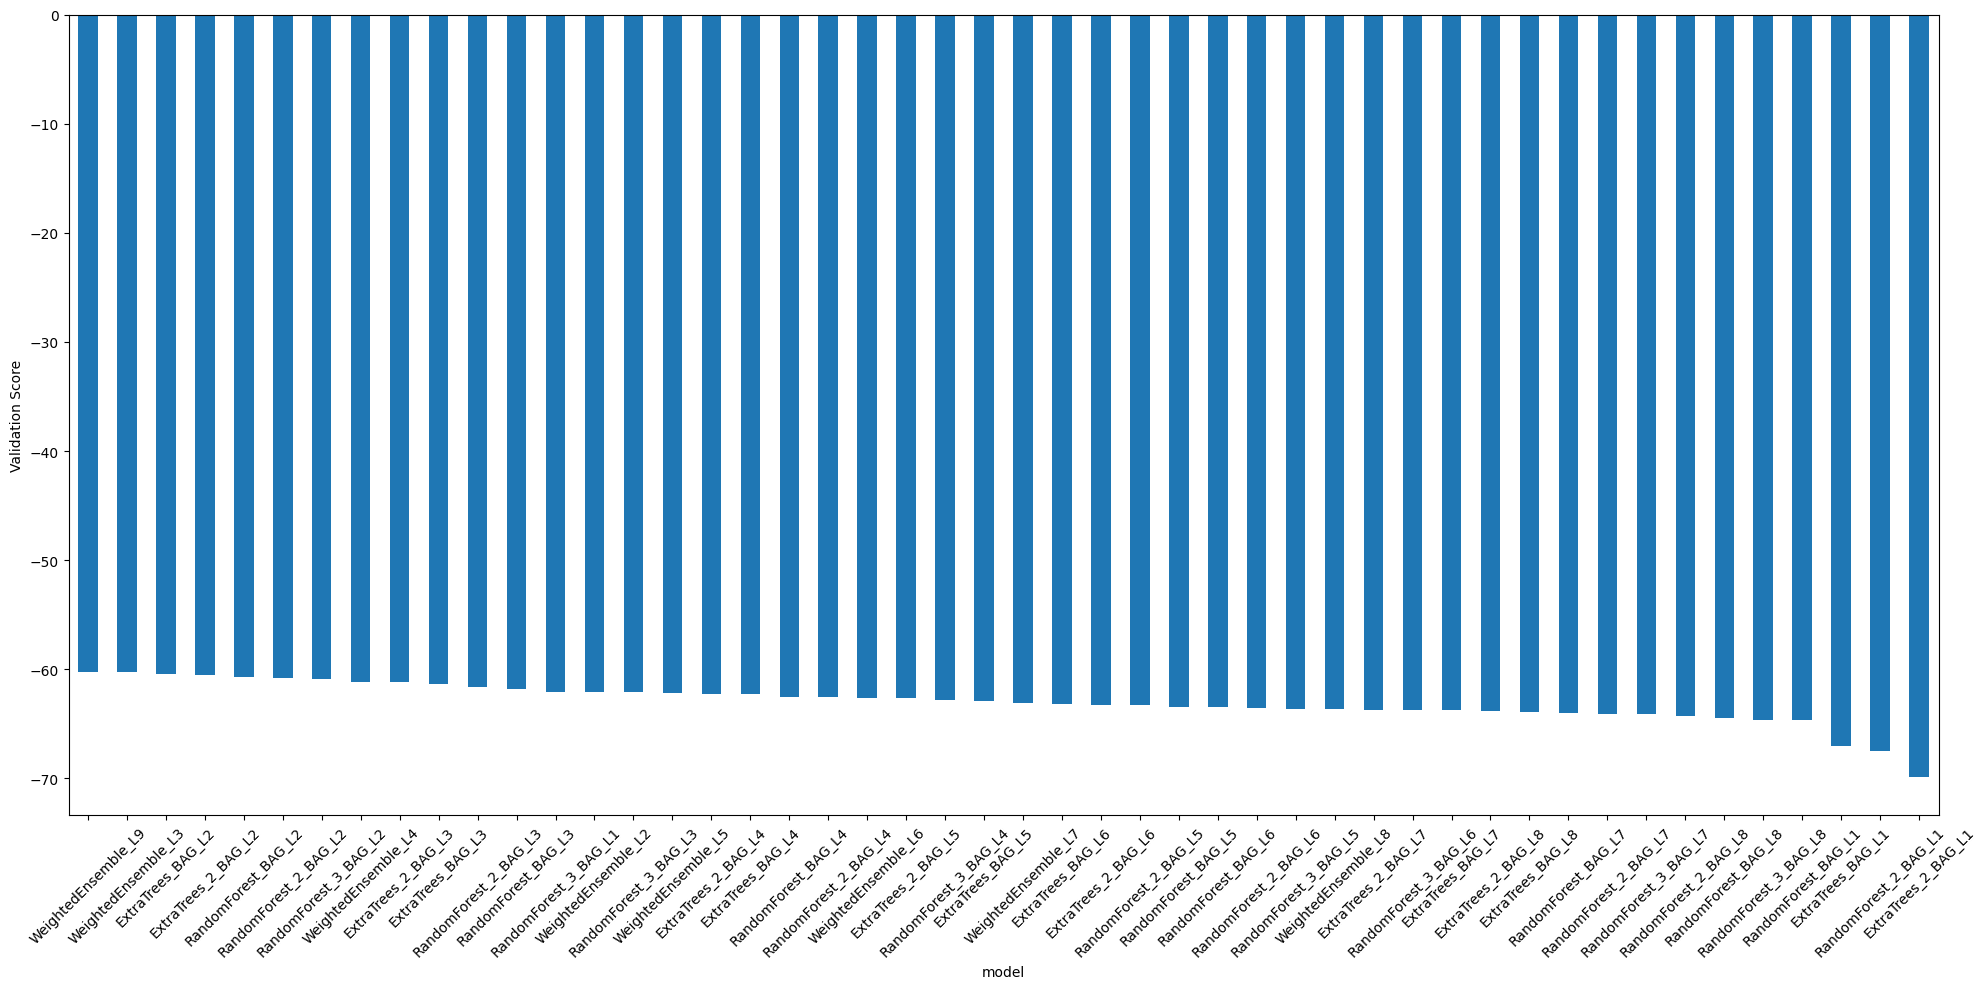

In [71]:
# predictor_new_hpo.leaderboard(silent= True).plot(kind='bar', x='model' , y='score_val' )

import matplotlib.pyplot as plt

ax = predictor_new_hpo.leaderboard(silent=True).plot(
    kind='bar',
    x='model',
    y='score_val',
    figsize=(20, 10),     
    legend=False
   
)

plt.xticks(rotation=45)
plt.ylabel("Validation Score")
plt.tight_layout()
plt.show()

In [55]:
predictions_new_hpo = predictor_new_hpo.predict(test)
predictions_new_hpo.head()

0    12.533541
1     7.381921
2     6.654873
3     3.491024
4     3.696442
Name: count, dtype: float32

In [56]:
predictions_new_hpo[predictions_new_hpo<0].count()

0

In [57]:
# Remember to set all negative values to zero
predictions_new_hpo = predictions_new_hpo.clip(lower=0)

In [58]:
# Same submitting predictions

# submission_new_hpo = pd.read_csv('sampleSubmission.csv', parse_dates=['datetime'])
submission_new_hpo = pd.read_csv("/kaggle/input/bike-sharing-demand/sampleSubmission.csv", parse_dates=['datetime'])
submission_new_hpo["count"] = predictions_new_hpo
submission_new_hpo.to_csv("submission_new_hpo.csv", index=False)

In [59]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_hpo.csv -m "new features with hyperparameters"

100%|████████████████████████████████████████| 188k/188k [00:02<00:00, 90.0kB/s]
Successfully submitted to Bike Sharing Demand

In [60]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                     date                        description                               status                     publicScore  privateScore  
---------------------------  --------------------------  ----------------------------------------  -------------------------  -----------  ------------  
submission_new_hpo.csv       2025-05-29 16:12:54.597000  new features with hyperparameters         SubmissionStatus.COMPLETE  0.50686      0.50686       
submission_new_features.csv  2025-05-29 15:59:32.247000  new features                              SubmissionStatus.COMPLETE  0.56802      0.56802       
submission.csv               2025-05-29 15:48:01.340000  first raw submission                      SubmissionStatus.COMPLETE  1.79738      1.79738       
submission.csv               2025-05-29 14:18:38.597000  first raw submission                      SubmissionStatus.COMPLETE  1.79791      1.79791       
tail: write error: Broken pipe


#### New Score of `0.50686`

## Step 7: Write a Report
### Refer to the markdown file for the full report
### Creating plots and table for report

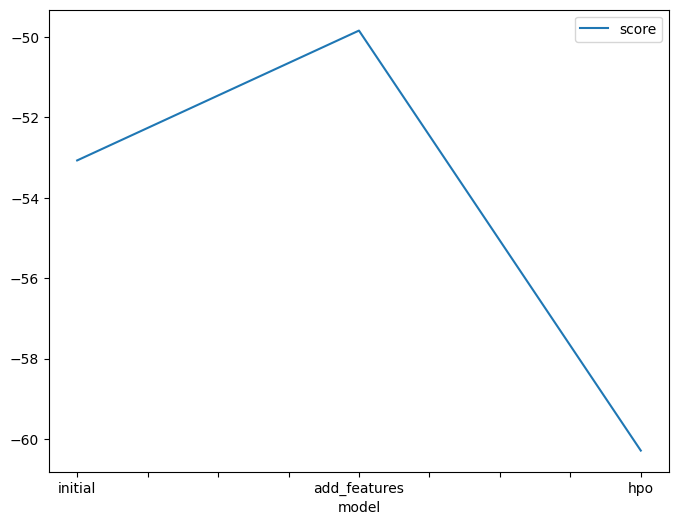

In [61]:
# Taking the top model score from each training run and creating a line plot to show improvement
# You can create these in the notebook and save them to PNG or use some other tool (e.g. google sheets, excel)
fig = pd.DataFrame(
    {
        "model": ["initial", "add_features", "hpo"],
        "score": [-53.069801 , -49.839031, -60.289317]
    }
).plot(x="model", y="score", figsize=(8, 6)).get_figure()
fig.savefig('model_train_score.png')

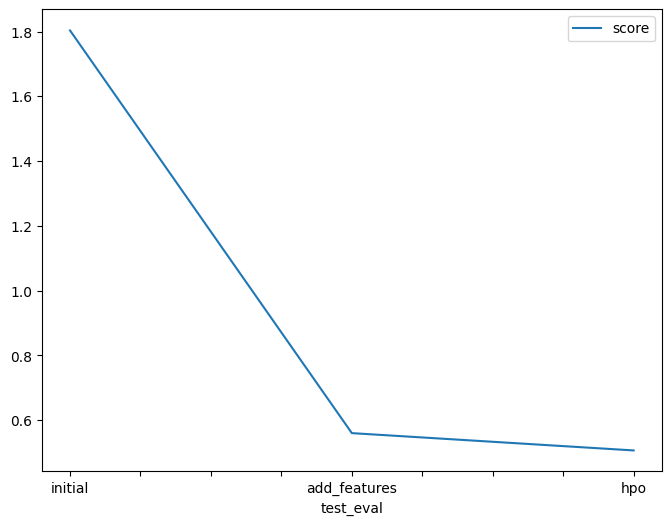

In [62]:
# Take the 3 kaggle scores and creating a line plot to show improvement
fig = pd.DataFrame(
    {
        "test_eval": ["initial", "add_features", "hpo"],
        "score": [1.80342, 0.56030, 0.50686]
    }
).plot(x="test_eval", y="score", figsize=(8, 6)).get_figure()
fig.savefig('model_test_score.png')

### Hyperparameter table

In [63]:
# The 3 hyperparameters we tuned with the kaggle score as the result
pd.DataFrame({
    "model": ["initial", "add_features", "hpo"],
    "hpo1": ['actual features', 'engineered features', 'custom hyperparameters and hyperparameter_tune_kwargs'],
    "hpo2": ['eval metric', 'eval metric', 'num_bag_folds'],
    "hpo3": ['presets', 'presets', 'num_stack_levels'],
    "score": [1.80342, 0.56030, 0.50686]
})

,model,hpo1,hpo2,hpo3,score
0,initial,actual features,eval metric,presets,1.80342
1,add_features,engineered features,eval metric,presets,0.56030
2,hpo,custom hyperparameters and hyperparameter_tune_kwargs,num_bag_folds,num_stack_levels,0.50686


### Testing individual algorithm types

In [75]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor

#Reading Original data again 
train = pd.read_csv("/kaggle/input/bike-sharing-demand/train.csv",parse_dates=['datetime'])
test = pd.read_csv("/kaggle/input/bike-sharing-demand/test.csv",parse_dates=['datetime'])


# Prepare data
features = train.drop(['count', 'datetime', 'casual', 'registered'], axis=1)
target = train['count']

# Encode categorical variables
features = pd.get_dummies(features)
test_encoded = pd.get_dummies(test[features.columns])

# Split data
X_train, X_val, y_train, y_val = train_test_split(features, target, test_size=0.2, random_state=0)

# Define models
models = {
    "Linear": LinearRegression(),
    "KNN": KNeighborsRegressor(),
    "Random Forest": RandomForestRegressor(random_state=0),
    "XGBoost": XGBRegressor(random_state=0)
   
}

rmse_scores = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    pred = model.predict(X_val)
    rmse = sqrt(mean_squared_error(y_val, pred))
    rmse_scores[name] = rmse
    print(f"{name} RMSE: {rmse:.4f}")

Linear RMSE: 156.5120
KNN RMSE: 160.9487
Random Forest RMSE: 154.3969
XGBoost RMSE: 149.5957
